Number of clusters: 4
Davies-Bouldin Index: 0.92


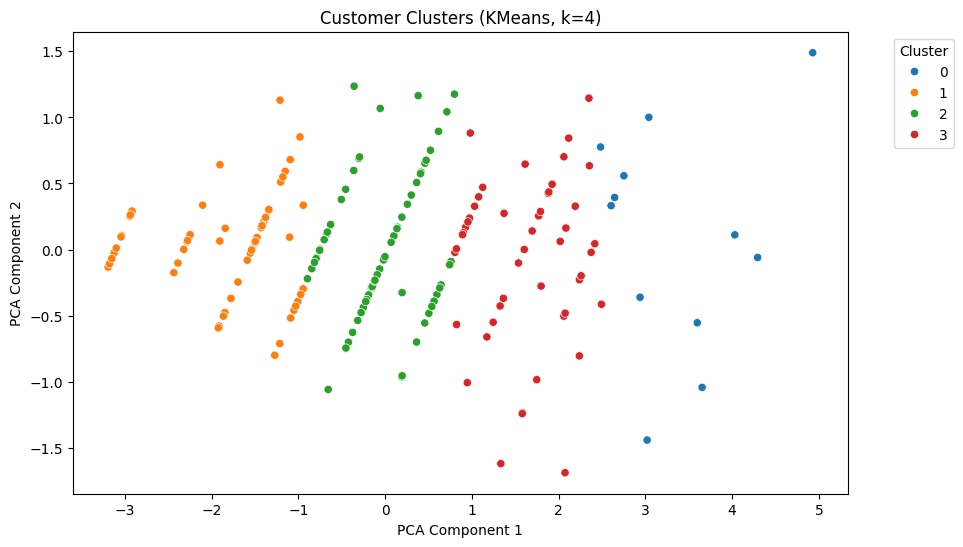

Cluster assignments saved to Customer_Clusters_KMeans.csv


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

transactions_merged = transactions.merge(products, on='ProductID', how='left')
transactions_merged = transactions_merged.merge(customers, on='CustomerID', how='left')

customer_profiles = transactions_merged.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_transactions=('TransactionID', 'count'),
    unique_products=('ProductID', pd.Series.nunique)
).reset_index()

scaler = StandardScaler()
customer_profiles_scaled = scaler.fit_transform(customer_profiles[['total_spent', 'total_transactions', 'unique_products']])

kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles_scaled)

db_index = davies_bouldin_score(customer_profiles_scaled, customer_profiles['Cluster'])

print(f"Number of clusters: 4")
print(f"Davies-Bouldin Index: {db_index:.2f}")

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(customer_profiles_scaled)
customer_profiles['PCA1'] = reduced_features[:, 0]
customer_profiles['PCA2'] = reduced_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_profiles,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='tab10'
)
plt.title('Customer Clusters (KMeans, k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

customer_profiles[['CustomerID', 'Cluster']].to_csv('Customer_Clusters_KMeans.csv', index=False)
print("Cluster assignments saved to Customer_Clusters_KMeans.csv")
